#### Script Description
This script loads the complete merged dataset

*File Name:* 01_10_Splitting_Dataset.ipynb

*Date:* 2024

*Created by:* Rob Alamgir  

*Version:* 1.0

*References:*

#### Import the relevant packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.cm as cm

#### Step 1: Load Data

In [2]:
# Load and preprocess data
#data_path = "C:/Data_MSc_Thesis/Pre_Processed_Data/Pre_Processed_Data_All_Locations_Updated_4.csv"
data_path = "C:/Data_MSc_Thesis/Pre_Processed_Data/Pre_Processed_Data_All_Locations_Updated_5.csv"
Complete_Data = pd.read_csv(data_path)

# Convert 'Date' column to datetime format and encode 'Source' as numeric codes
Complete_Data['Date'] = pd.to_datetime(Complete_Data['Date'], format='%Y-%m-%d')
Complete_Data['Source_ID'] = Complete_Data['Source'].astype('category').cat.codes + 1

# Filter data from 2020 onwards and scale 'SWCT_015' values
Complete_Data = Complete_Data[Complete_Data['Date'] >= '2020-01-01']
#Complete_Data['SWCT_1_015'] = Complete_Data['SWCT_1_015'] / 100  # SENTEK Soil Moisture values are dicided by 100 to scale them 

#### Step 2: Define the temporal ranges for summer and winter

In [3]:
# Define summer and winter date ranges
#summer_start = "04-01"  
#summer_end = "08-31"    
#winter_start = "09-01"  
#winter_end = "03-31"    

summer_start = "05-01"  
summer_end = "09-30"    
winter_start = "10-01"  
winter_end = "04-30" 

# Create a 'month-day' column for comparison
Complete_Data['Month_Day'] = Complete_Data['Date'].dt.strftime('%m-%d')

# Create masks for summer and winter
summer_mask = (Complete_Data['Month_Day'] >= summer_start) & (Complete_Data['Month_Day'] <= summer_end)
winter_mask = ((Complete_Data['Month_Day'] >= winter_start) | 
               (Complete_Data['Month_Day'] <= winter_end))  # Handles December to February

# Split into summer and winter datasets
summer_data = Complete_Data[summer_mask].copy()
winter_data = Complete_Data[winter_mask].copy()

# Drop the auxiliary 'Month_Day' column from the datasets
summer_data.drop(columns=['Month_Day'], inplace=True)
winter_data.drop(columns=['Month_Day'], inplace=True)

# Check the size of the datasets
print(f"Summer_Data size: {summer_data.shape[0]} rows and {summer_data.shape[1]} columns.")
print(f"Winter_Data size: {winter_data.shape[0]} rows and {winter_data.shape[1]} columns.")

#print(summer_data.head(10))
#print(summer_data.describe())
#print(summer_data.columns)
#print(summer_data.dtypes)

Summer_Data size: 15265 rows and 107 columns.
Winter_Data size: 20957 rows and 107 columns.


#### Plot scatter timeseries plots for the summer 

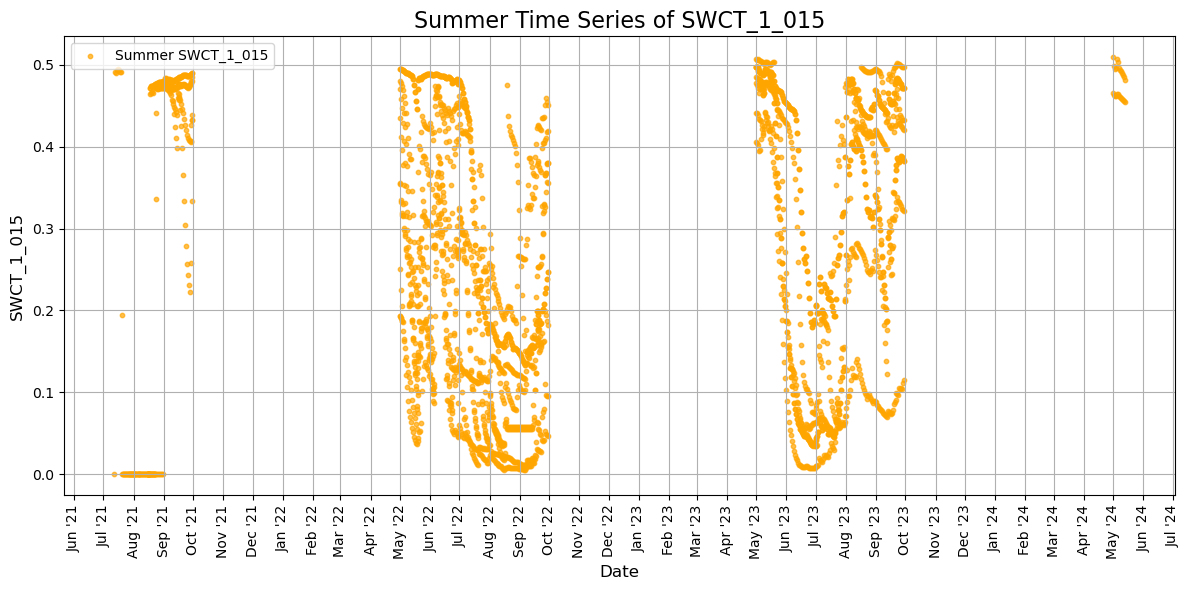

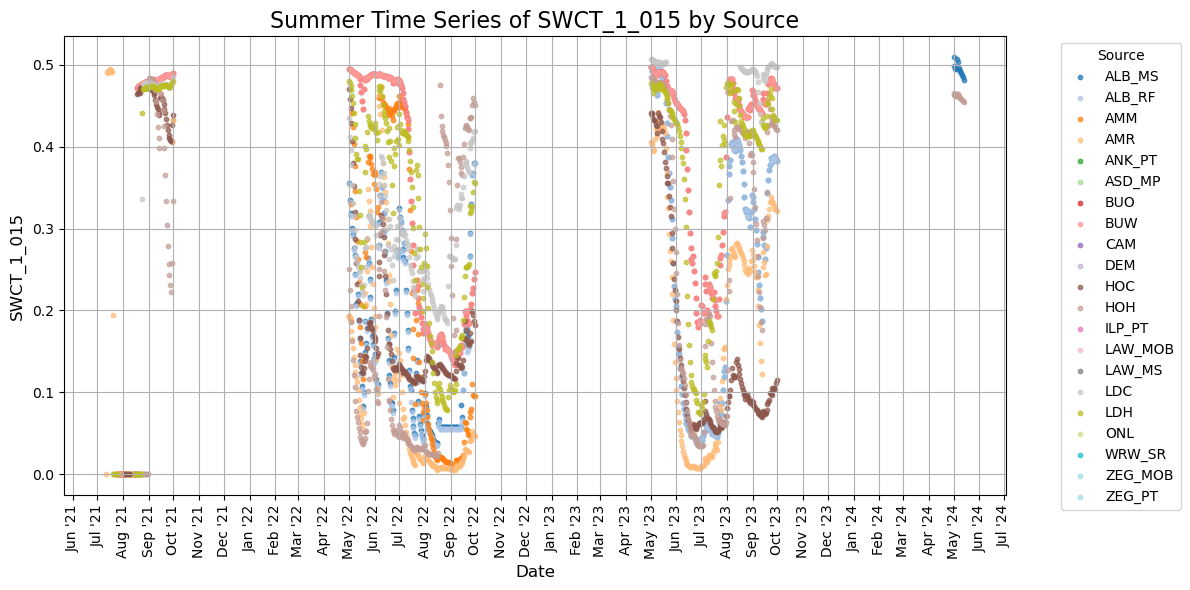

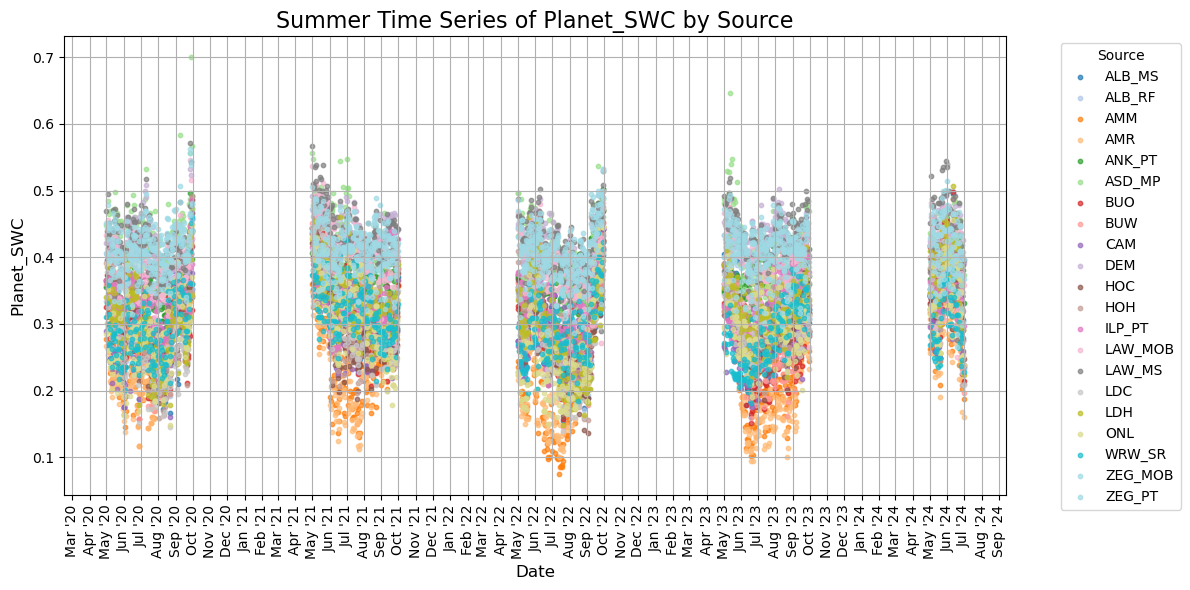

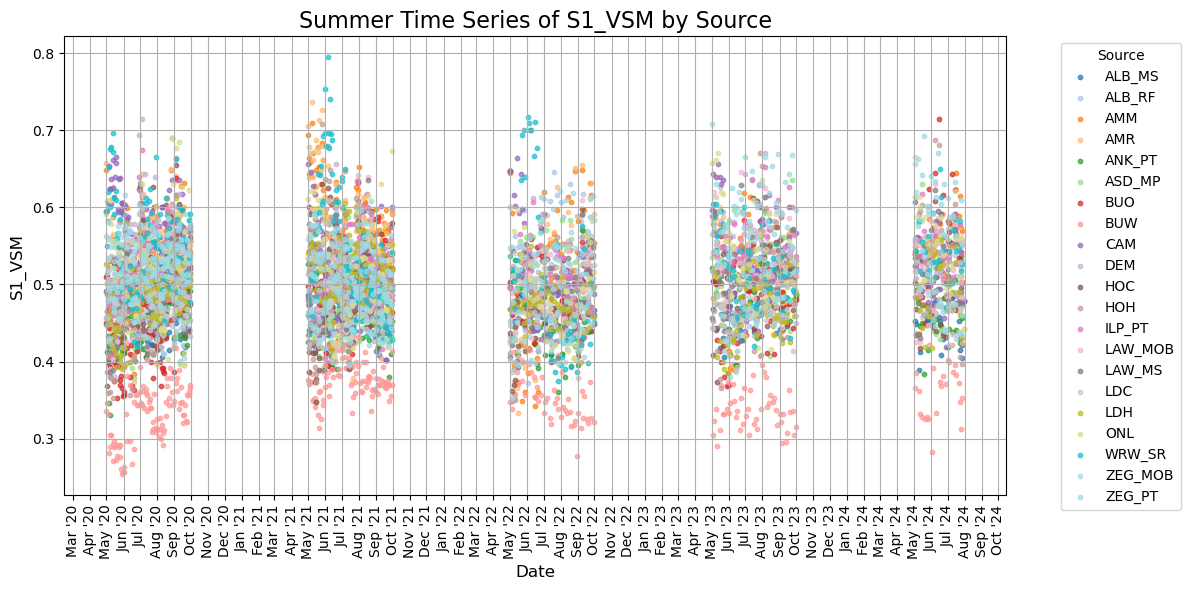

In [4]:
# Plotting SWCT_1_015 for Summer_Data
plt.figure(figsize=(12, 6))
plt.scatter(summer_data['Date'], summer_data['SWCT_1_015'], 
            label='Summer SWCT_1_015', color='orange', alpha=0.7, s=10)
plt.title('Summer Time Series of SWCT_1_015', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SWCT_1_015', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend()
plt.tight_layout()
plt.show()


# Get unique sources and assign colors
sources = summer_data['Source'].unique()
colors = cm.tab20(np.linspace(0, 1, len(sources)))  # Use a colormap with enough distinct colors
source_color_map = dict(zip(sources, colors))  # Map each source to a color

# Scatter plot for SWCT_1_015 in Summer_Data
plt.figure(figsize=(12, 6))
for source in sources:
    subset = summer_data[summer_data['Source'] == source]
    plt.scatter(subset['Date'], subset['SWCT_1_015'], 
                label=source, color=source_color_map[source], alpha=0.7, s=10)
plt.title('Summer Time Series of SWCT_1_015 by Source', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SWCT_1_015', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Scatter plot for Planet_SWC in Summer_Data
plt.figure(figsize=(12, 6))
for source in sources:
    subset = summer_data[summer_data['Source'] == source]
    plt.scatter(subset['Date'], subset['Planet_SWC'], 
                label=source, color=source_color_map[source], alpha=0.7, s=10)
plt.title('Summer Time Series of Planet_SWC by Source', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Planet_SWC', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Scatter plot for S1_VSM in Summer_Data
plt.figure(figsize=(12, 6))
for source in sources:
    subset = summer_data[summer_data['Source'] == source]
    plt.scatter(subset['Date'], subset['S1_VSM'], 
                label=source, color=source_color_map[source], alpha=0.7, s=10)
plt.title('Summer Time Series of S1_VSM by Source', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('S1_VSM', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Plot scatter timeseries plots for the winter 

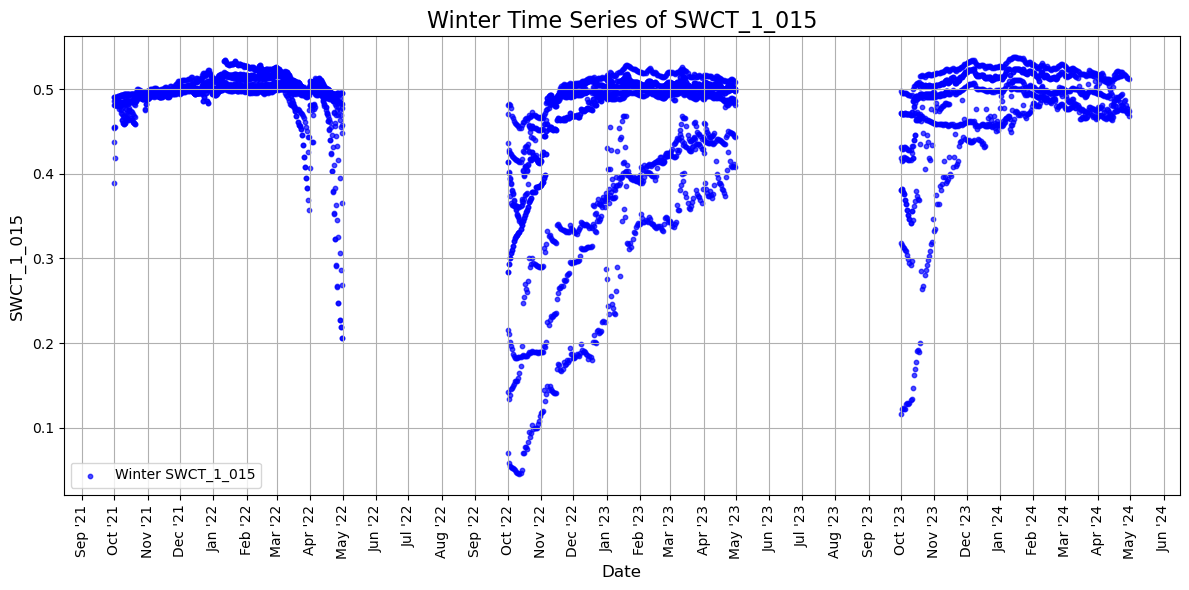

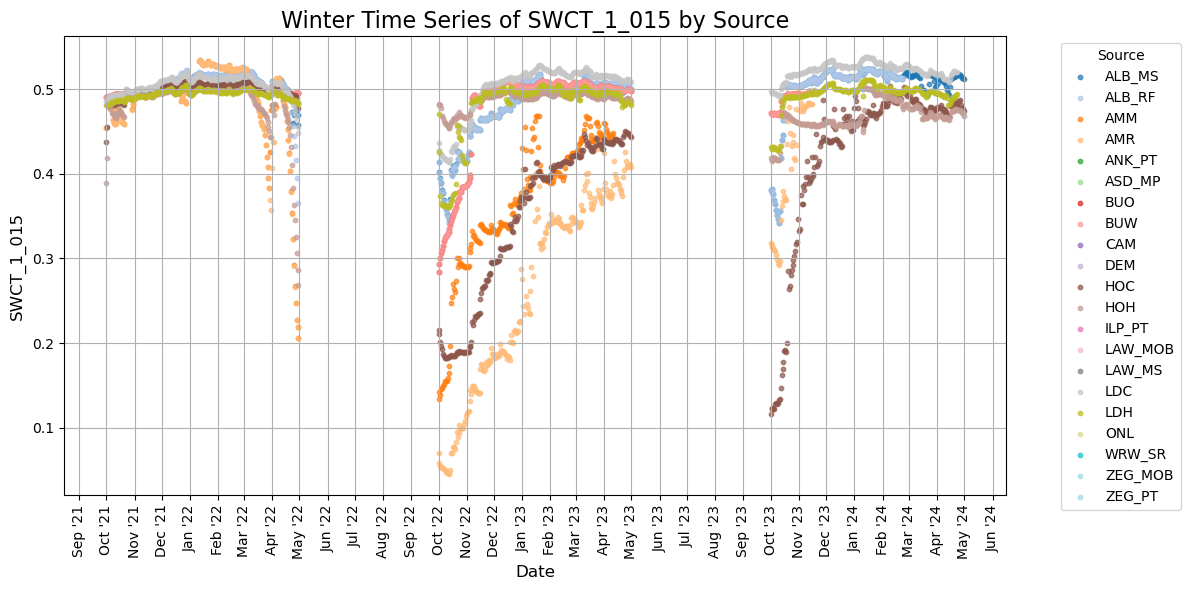

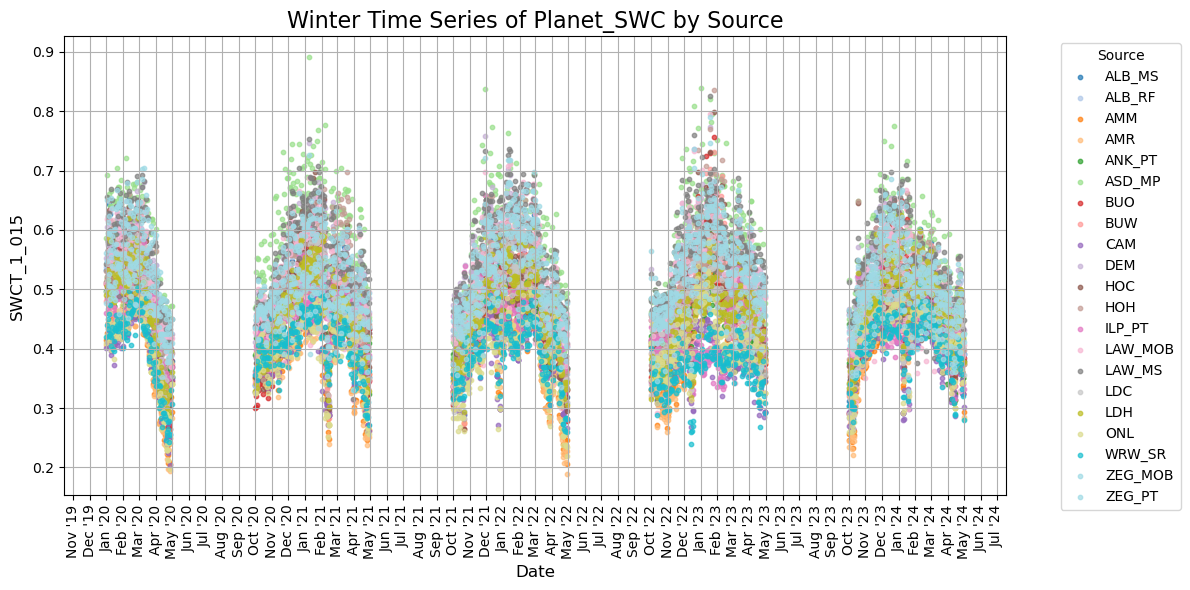

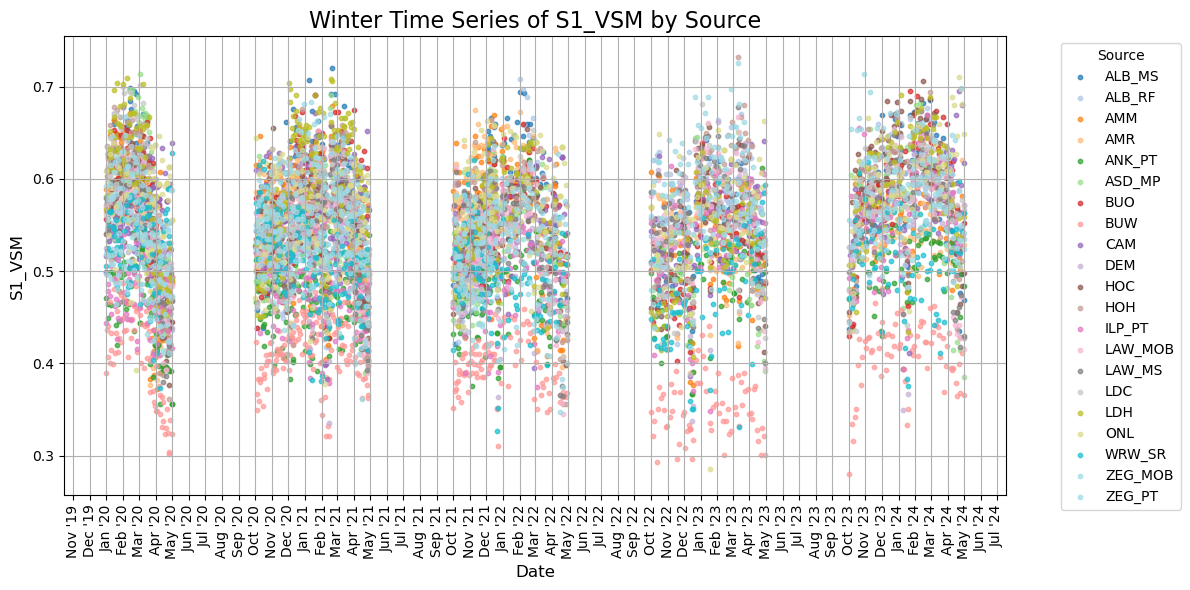

In [5]:
# Plotting SWCT_1_015 for Winter_Data
plt.figure(figsize=(12, 6))
plt.scatter(winter_data['Date'], winter_data['SWCT_1_015'], 
            label='Winter SWCT_1_015', color='blue', alpha=0.7, s=10)
plt.title('Winter Time Series of SWCT_1_015', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SWCT_1_015', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend()
plt.tight_layout()
plt.show()



# Scatter plot for SWCT_1_015 in Winter_Data
plt.figure(figsize=(12, 6))
for source in sources:
    subset = winter_data[winter_data['Source'] == source]
    plt.scatter(subset['Date'], subset['SWCT_1_015'], 
                label=source, color=source_color_map[source], alpha=0.7, s=10)
plt.title('Winter Time Series of SWCT_1_015 by Source', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SWCT_1_015', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Scatter plot for SWCT_1_015 in Winter_Data
plt.figure(figsize=(12, 6))
for source in sources:
    subset = winter_data[winter_data['Source'] == source]
    plt.scatter(subset['Date'], subset['Planet_SWC'], 
                label=source, color=source_color_map[source], alpha=0.7, s=10)
plt.title('Winter Time Series of Planet_SWC by Source', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SWCT_1_015', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Scatter plot for S1_VSM in Summer_Data
plt.figure(figsize=(12, 6))
for source in sources:
    subset = winter_data[winter_data['Source'] == source]
    plt.scatter(subset['Date'], subset['S1_VSM'], 
                label=source, color=source_color_map[source], alpha=0.7, s=10)
plt.title('Winter Time Series of S1_VSM by Source', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('S1_VSM', fontsize=12)
plt.grid(True)

# Formatting x-axis to display months and last two digits of the year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Export the datasets

In [6]:
# Define file paths for export
summer_data_path = "C:/Data_MSc_Thesis/Pre_Processed_Data/Pre_Processed_Data_All_Locations_Updated_5_Summer_Data.csv"
winter_data_path = "C:/Data_MSc_Thesis/Pre_Processed_Data/Pre_Processed_Data_All_Locations_Updated_5_Winter_Data.csv"

# Export summer and winter data to CSV
summer_data.to_csv(summer_data_path, index=False)
winter_data.to_csv(winter_data_path, index=False)

print(f"Summer dataset exported to {summer_data_path}.")
print(f"Winter dataset exported to {winter_data_path}.")

Summer dataset exported to C:/Data_MSc_Thesis/Pre_Processed_Data/Pre_Processed_Data_All_Locations_Updated_5_Summer_Data.csv.
Winter dataset exported to C:/Data_MSc_Thesis/Pre_Processed_Data/Pre_Processed_Data_All_Locations_Updated_5_Winter_Data.csv.
